In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
customers = pd.read_csv('../data/cleaned/customers.csv')
orders = pd.read_csv('../data/cleaned/orders.csv')
order_items = pd.read_csv('../data/cleaned/order_items.csv')
products = pd.read_csv('../data/cleaned/products.csv')
payments = pd.read_csv('../data/cleaned/payments.csv')


In [3]:
df = (
    order_items
    .merge(orders, on='order_id', how='inner')
    .merge(products, on='product_id', how='left')
)


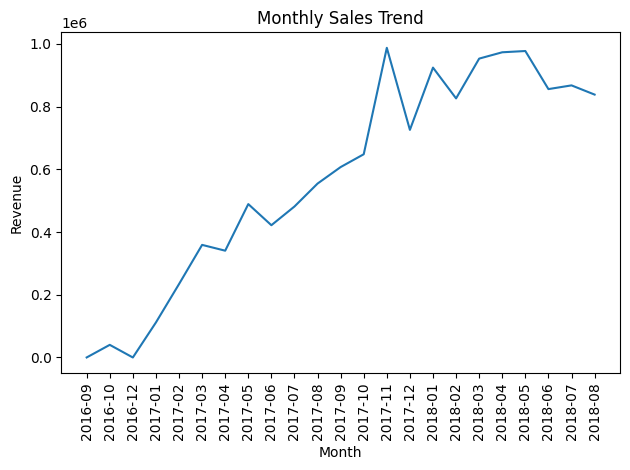

In [4]:
df['order_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.to_period('M')

monthly_sales = (
    df.groupby('order_month')['price']
      .sum()
      .reset_index()
)

monthly_sales['order_month'] = monthly_sales['order_month'].astype(str)

plt.figure()
plt.plot(monthly_sales['order_month'], monthly_sales['price'])
plt.xticks(rotation=90)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


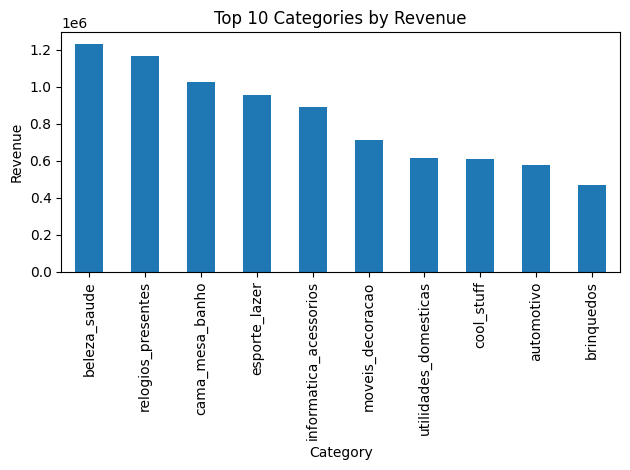

In [5]:
top_categories = (
    df.groupby('product_category_name')['price']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
top_categories.plot(kind='bar')
plt.title('Top 10 Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


In [6]:
order_revenue = (
    df.groupby('order_id')['price']
      .sum()
      .reset_index()
)

aov = order_revenue['price'].mean()
aov


np.float64(137.0415857501192)

In [7]:
# Merge orders with customers to get customer_unique_id
merged = orders.merge(customers, on='customer_id', how='left')

# Count orders per actual customer (using customer_unique_id)
orders_per_customer = (
    merged.groupby('customer_unique_id')['order_id']
    .nunique()
    .reset_index(name='order_count')
)

# Calculate new vs repeat customers
new_customers = (orders_per_customer['order_count'] == 1).sum()
repeat_customers = (orders_per_customer['order_count'] > 1).sum()

new_customers, repeat_customers


(np.int64(90557), np.int64(2801))

In [8]:
total_customers = len(orders_per_customer)
repeat_rate = repeat_customers / total_customers * 100

repeat_rate

np.float64(3.0002784978255748)